# Computational Methods in Ordinary Differential Equations

*Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University*

---
# Boundary Value Problems

#### Learning outcomes

On successful completion of this page readers will be able to:

- Understand the definition of a **two-point boundary value problem**.
- Apply the [**shooting method**](#Shooting-method) to solve a boundary value problem.
- Implement the [**Secant method**](#Improving-the-guess-value-using-the-Secant-method) to calculate estimates of the initial value.
- Implement the [**finite-difference method**](#Finite-difference-method) to solve boundary value problems.
- Implement the [**Thomas algorithm**](#The-Thomas-algorithm) to solve a tridiagonal linear system of equations.

A [**Boundary Value Problem**](https://en.wikipedia.org/wiki/Boundary_value_problem) (BVP) is an Ordinary Differential Equation (ODE) where the solutions at the boundaries of the domain are known. A common type of a BVP is the **two-point BVP** which is written using a second-order ODE

<a id="bvp"></a>
\begin{align*}
    y'' &= f(t, y), & t &\in [t_{\min}, t_{\max}], & y(t_{\min}) &= y_0 & y(t_{\max}) &= y_N, && (1)
\end{align*}

for some known values $y_0$ and $y_N$.

## Shooting method

Consider the two-point BVP from equation [(1)](#bvp). Since the ODE solvers we use can only be applied to a first-order ODE we need to rewrite the second-order ODE as a system of two first-order ODEs

\begin{align*}
    y_1' &= y_2, \\
    y_2' &= f(t, y_1, y_2).
\end{align*}

Since we have let $y_1=y$ we know that $y_1(t_{\min})=y_0$ from the problem definition but we do not know that value of $y_2(t_{\min}) = y'(t_{\min})$. To overcome this problem we simply guess this value and compute the solutions to the [Initial Value Problem](https://en.wikipedia.org/wiki/Initial_value_problem) (IVP) and compare the solution of $y_1(t_{\max})$ to $y(t_{\max})=y_N$ and adjust the guess value accordingly. This method is called the [**shooting method**](https://en.wikipedia.org/wiki/Shooting_method) because someone shooting at a target will adjust their next shot based where their previous shot landed.

#### Example 1

Use the shooting method to solve the following BVP

\begin{align*}
    y'' - y' - y &= 0, & t &\in [0, 1], & y(0) &= 1, & y(1) &= 2.
\end{align*}

Rewriting this as a system of first-order ODEs gives

\begin{align*}
    y_1' &= y_2, & y_1(0) &= 1, \\
    y_2' &= y_2 + y_1, & y_2(0) &= s,
\end{align*}

where $s$ is a guess of $y'(0)$.

The function defined below calculates the solution to an IVP using the Euler method

In [1]:
import numpy as np

def euler(f, tspan, y0, h):
    '''
    Calculates the solution to an IVP using the Euler method
    '''
    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0
    
    # Solver loop
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h
        
    return t, y

The function defined below calculates the right-hand side of the system of ODEs.

In [2]:
def f(t, y):
    dy = np.zeros(y.shape)
    dy[0] = y[1]
    dy[1] = y[1] + y[0]
    return dy

The program below solves the BVP problem defined here using the guess values $s=1$, $s=2$ and $s=1.5$.

------------------------------
  n  |  t  |  y_1   |  y_2 
------------------------------
  0  | 0.0 | 0.0000 | 1.0000
  1  | 0.2 | 0.2000 | 1.2000
  2  | 0.4 | 0.4400 | 1.4800
  3  | 0.6 | 0.7360 | 1.8640
  4  | 0.8 | 1.1088 | 2.3840
  5  | 1.0 | 1.5856 | 3.0826
------------------------------

------------------------------
  n  |  t  |  y_1   |  y_2 
------------------------------
  0  | 0.0 | 0.0000 | 2.0000
  1  | 0.2 | 0.4000 | 2.4000
  2  | 0.4 | 0.8800 | 2.9600
  3  | 0.6 | 1.4720 | 3.7280
  4  | 0.8 | 2.2176 | 4.7680
  5  | 1.0 | 3.1712 | 6.1651
------------------------------

------------------------------
  n  |  t  |  y_1   |  y_2 
------------------------------
  0  | 0.0 | 0.0000 | 1.5000
  1  | 0.2 | 0.3000 | 1.8000
  2  | 0.4 | 0.6600 | 2.2200
  3  | 0.6 | 1.1040 | 2.7960
  4  | 0.8 | 1.6632 | 3.5760
  5  | 1.0 | 2.3784 | 4.6238
------------------------------



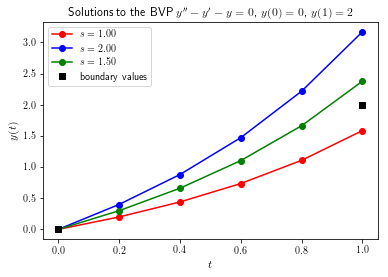

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Define BVP parameters
tspan = [ 0, 1 ]      # t domain
bvals = [ 0, 2 ]      # boundary values
s = [ 1, 2, 1.5 ]     # guess values for y'(0)
h = 0.2               # step length

# Loop through the 3 guess values
for i in range(3):
    
    # Solve IVP using the Euler method
    t, y1 = euler(f, tspan, [ bvals[0], s[i] ], h)
    
    # Append current solution to y array
    if i == 0:
        y = y1
    else:
        y = np.append(y, y1, axis=1)

# Output tables of solutions
hline = '-' * 30
for j in range(3):
    print('{0}\n  n  |  t  |  y_1   |  y_2 \n{0}'. format(hline))
    for i in range(len(t)):
        print(' {:2d}  | {:0.1f} | {:0.4f} | {:0.4f}'.format(i, t[i], y[i,2*j], y[i,2*j+1]))
    print(hline + '\n')

# Plot solution
colours = ['r', 'b', 'g']
fig, ax = plt.subplots()

for i in range(3):
    ax.plot(t, y[:,2*i], 'o-', color=colours[i], label='$s={:0.2f}$'.format(y[0,1+2*i]))
ax.plot(tspan, bvals, 'ks', label='boundary values')

ax.set_title("Solutions to the BVP $y'' - y' - y = 0$, $y(0) = 0$, $y(1) = 2$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Comparing the solutions of $y(1)$ to the boundary value of $y(1)=2$ we can see that using $s=1$ results in $y_1(1) = 1.5856$ which is too small and using $s=1$ results in $y(1) = 3.1712$ which is too large. Choosing a guess of somewhere inbetween such as $s=0.5$ results in $y(1) = 2.2384$ which is closer to the exact solution but still not an accurate approximation.

### Improving the guess value using the Secant method
To improve the guess value we can use the [**Secant method**](https://en.wikipedia.org/wiki/Secant_method). The Secant method is a root finding algorithm that calculates the value of $s$ where $F(s) = 0$ for some function $F$

$$s_{i+1} = s_i - F(s_i) \frac{s_i - s_{i-1}}{F(s_i) - F(s_{i-1})}.$$

This expression is iterated until $|s_i - s_{i-1}| < tol$ where tol is some small number. Since we want the solution of $f'(t_{\max})$ to be equal to the upper boundary value $y_N$ we can define

$$F(s) = f'(t_{\max}) - y_N, $$

and use the Secant method to calculate $s$.

The function defined below solves a BVP using the shooting method with the Secant method to calculate an improved guess value using two starting guess values of $s=1$ and $s=2$. The input arguments `odesolver`, `odefun`, `tspan` and `bval` specifies the IVP solver, the ODE function, the lower and upper boundaries of the $t$ domain and the boundary values. The variables `s1`, `s0`, `F1` and `F0` denote $s_{i}$, $s_{i-1}$, $F(s_i)$ and $F(s_{i-1})$ respectively and the Secant method is iterated until $|s_{i} - s_{i-1}| \leq 10^{-6}$. 

In [4]:
def shooting_method(odesolver, odefun, tspan, bvals):
    
    # Solve IVP using first guess value s = 1
    s0, s1 = 1, 2
    t, y = odesolver(odefun, tspan, [ bvals[0], s0 ], h)
    F0 = y[-1, 0] - bvals[1]
    
    # Iterate until successive guess values agree
    while abs(s1 - s0) > 1e-6:

        # Solve IVP using current guess value
        t, y1 = odesolver(odefun, tspan, [ bvals[0], s1 ], h)

        # Append current solution to y
        y = np.append(y, y1, axis=1)

        # Use Secant method to calculate next guess value after first iteration
        F1 = y1[-1, 0] - bvals[-1]
        s1, s0, F0 = s1 - F1 * (s1 - s0) / (F1 - F0), s1, F1   
        
    return t, y

#### Example 2

Use the shooting method to calculate the solution of the BVP from [example 1](#Example-1).

------------------------------
  n  |  t  |  y_1   |  y_2 
------------------------------
  0  | 0.0 | 0.0000 | 1.2614
  1  | 0.2 | 0.2523 | 1.5136
  2  | 0.4 | 0.5550 | 1.8668
  3  | 0.6 | 0.9284 | 2.3512
  4  | 0.8 | 1.3986 | 3.0071
  5  | 1.0 | 2.0000 | 3.8882
------------------------------


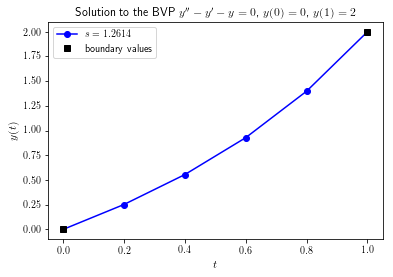

In [5]:
# Define BVP parameters
tspan = [ 0, 1 ]      # t domain
bvals = [ 0, 2 ]      # boundary values
h = 0.2               # step length

# Solve BVP using the shooting method
t, y = shooting_method(euler, f, tspan, bvals)

# Output solution table
hline = '-' * 30
print('{0}\n  n  |  t  |  y_1   |  y_2 \n{0}'.format(hline))
for i in range(len(t)):
    print(' {:2d}  | {:0.1f} | {:0.4f} | {:0.4f}'.format(i, t[i], y[i,2*j], y[i,2*j+1]))
print(hline)

# Plot solution
fig, ax = plt.subplots()

ax.plot(t, y[:,-2], 'bo-', label='$s={:0.4f}$'.format(y[0,-1]))
ax.plot(tspan, bvals, 'ks', label='boundary values')

ax.set_title("Solution to the BVP $y'' - y' - y = 0$, $y(0) = 0$, $y(1) = 2$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here the Secant method converged to a guess value of $s=1.2614$ which provides a solution at the upper boundary of $y(1)=2.0000$.

### A note about accuracy
In [example 2](#Example-2) we iterated the Secant method until convergence and got a very accurate solution for the value of $y(t_{\max})$. We must be careful not to forget that this solution was obtained using the Euler method which being only first-order so expect it to be relatively innacurate. 

The exact solution to the BVP from [example 1](#Example-1) above is

$$y = \frac{2e^{-\frac{1}{2}(\sqrt{5} - 1)(t-1)}(e^{\sqrt{5}t} - 1)}{e^{\sqrt{5}} - 1}$$

which is defined in the function below.

In [6]:
def exact_sol(t):
    sqrt5 = np.sqrt(5)
    return (2 * np.exp(-0.5 * (sqrt5 - 1) * (t - 1)) * (np.exp(sqrt5 * t) - 1)) / (np.exp(sqrt5) - 1)

The code below plots the solution obtained using the Euler method with the guess value of $s=1.2614$ and compares it to the exact solution.

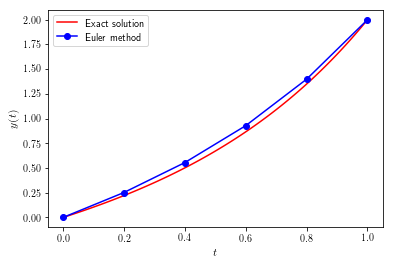

In [7]:
# Calculate exact solution
t1 = np.linspace(tspan[0], tspan[1], 100)
y1 = exact_sol(t1)

# Plot solution
fig, ax = plt.subplots()

ax.plot(t1, y1, 'r-', label='Exact solution')
ax.plot(t, y[:, -2], 'bo-', label='Euler method')

ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

So despite the Secant method giving a guess value that gives an accurate solution at the upper bounday, the use of the Euler method does not give an accurate solution in the interior points. One way to improve the accuracy of our approximation is to use a more accurate ODE solver.

The function below calculates the solution to an IVP using the second-order [Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (RK2). 

In [8]:
def rk2(f, tspan, y0, h):
    '''
    Calculates the solution to an IVP using the second-order Runge-Kutta method
    '''
    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0
    
    # Solver loop
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        y[n+1,:] = y[n,:] + h * k2
        t[n+1] = t[n] + h
        
    return t, y

The code below invokes the shooting method with the RK2 solver to solve the BVP from [example 1](#Example-1). 

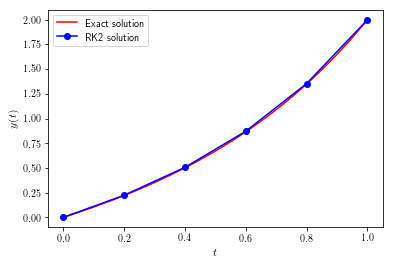

In [9]:
# Define BVP parameters
tspan = [ 0, 1 ]
bvals = [ 0, 2 ]
h = 0.2

# Use shooting method with RK2 to solve the BVP
t, y = shooting_method(rk2, f, tspan, bvals)

# Plot solution
fig, ax = plt.subplots()

ax.plot(t1, y1, 'r-', label='Exact solution')
ax.plot(t, y[:, -2], 'bo-', label='RK2 solution')

ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here we can see that we have a much more accurate solution than when we used the Euler method to solve the ODE.

---
## Finite-difference method

The [**finite-difference method**](https://en.wikipedia.org/wiki/Finite_difference_method) for solving a BVP converts the BVP into a system of algebraic equations by replacing the derivatives in the ODE with finite-difference approximations derived from the [Taylor series](https://en.wikipedia.org/wiki/Taylor_series). The system of equations is then solved to obtain an approximation of the solution to the BVP.

The solution is approximated at discrete points called **nodes** that are equally spaced in the domain. If $N$ nodes are used to **discretise** the domain then the spacing between two nodes is

$$ h = \frac{t_{\max} - t_{\min}}{N - 1}, $$

and the $t$ value of the $i$th node is calculated using $t_i = t_{\min} + ih$ and the solution  $y(t_i)$ is denoted by $y_i$ for brevity. The derivatives of $y_i$ are approximated using values of neighbouring nodes $y_{i+1}$, $y_{i-1}$ etc. using expressions derived by truncating the Taylor series and rearranging to make the derivative term the subject. Some common finite-difference approximations are listed in the table below.

| Derivative | Finite-difference approximation | Order of accuracy | Name |
|:--:|:--:|:--:|:--|
| $y'$ | <a id="forward_difference"></a> $\dfrac{y_{i+1} - y_{i}}{h}$ | 1st | forward difference |
| $y'$ | $\dfrac{y_i - y_{i-1}}{h}$ | 1st | backward difference |
| $y'$ | <a id="central_difference"></a>$\dfrac{y_{i+1} - y_{i-1}}{2h}$ | 2nd | central difference |
| $y''$ | <a id="symmetric_difference"></a>$\dfrac{y_{i-1} - 2y_i + y_{i+1}}{h^2}$ | 2nd | symmetric difference |

### Finite-difference solutions to a boundary value problem

The solution to a BVP using then finite-difference method is determined by approximating the derivatives in the ODE using finite-differences. Consider the following BVP 

\begin{align*}
    y'' &= f(t, y), & t &\in [t_{\min}, t_{\max}], & y(t_{\min}) &= y_0, & y(t_{\max}) &= y_N
\end{align*}

Using the [symmetric difference](#symmetric_difference) to approximate $y''$ in the ODE we have

\begin{align*}
    y_{i-1} - 2y_i + y_{i+1} &= h^2 f(t_i, y_i), & i &= 1, 2, \ldots, N-1.
\end{align*}

This is a linear system of $N-1$ equations. The values of the nodes at the lower and upper boundaries, $y_0$ and $y_N$, are known so the we can reduce this system to $N-3$ equations where

\begin{align*}
    -2y_1 + y_2 &= h^2 f(t_1, y_1) - y_0, \\
    y_{i-1} - 2y_i + y_{i+1} &= h^2 f(t_i, y_i), & i &= 2, 3, \ldots, N-2, \\
    y_{N-2} - 2y_{N-1} &= h^2 f(t_{N-1}, y_{N-1}) - y_N.
\end{align*}

This can be expressed as a matrix equation

\begin{align*}
    \pmatrix{-2 & 1 \\
    1 & -2 & 1 \\
    & \ddots & \ddots & \ddots \\
    & & 1 & -2 & 1 \\ 
    & & & 1 & -2}
    \pmatrix{y_1 \\ y_2 \\ \vdots \\ y_{N-2} \\ y_{N-1}} =
    \pmatrix{f(t_1, y_1) - y_0, \\ f(t_2, y_2) \\ \vdots \\ f(t_{N-2},y_{N-2}) \\ f(t_{N-1}, y_{N-1}) - y_N}.
\end{align*}

### The Thomas algorithm
We have seen above that the matrix equation resulting from a second-order two-point BVP has a tridiagnal coefficient matrix. This means we can use the [**Thomas Algorithm**](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm) which is a form of Gaussian elimination and very efficient for solving tridiagonal systems.

Given a linear tridagonal system of the form $A\mathbf{x} = \mathbf{d}$ then let $a_i$, $b_i$, $c_i$ be the elements on the lower, main and upperdiagonals of the coefficient matrix $A$ and $d_i$ be the values of the right-hand side vector $\mathbf{d}$

$$\pmatrix{ b_0 & c_0 \\
            a_1 & b_1 & c_1 \\
                & \ddots & \ddots & \ddots \\
                &        & a_{N-1} & b_{N-1} & c_{N-1} \\
                &        &         & a_{N}   & b_{N}}
\pmatrix{ x_0 \\ x_1 \\ \vdots \\ x_{N-1} \\ x_{N} } =
\pmatrix{ d_0 \\ d_1 \\ \vdots \\ d_{N-1} \\ d_{N} },
$$

The Thomas algorithm first uses a forward sweep to apply row operations to the values of $b_i$ and $d_i$ before solving for the values of $x_i$ by back substitition.

Forward sweep:

\begin{align*}
    b_i &= b_i - \frac{a_i}{b_{i-1}} c_{i-1}, & i &= 2, 3, \ldots N \\
    d_i &= d_i - \frac{a_i}{b_{i-1}} d_{i-1}, & i &= 2, 3, \ldots N.
\end{align*}

Back substitution

\begin{align*}
    x_n &= \frac{d_N}{b_N}, \\
    x_i &= \frac{d_i - c_i x_{i+1}}{b_i}, & i &= N-1, N-2, \ldots, 1.
\end{align*}

The function below solves a tridiagonal linear system using the Thomas algorithm given inputs of the arrays for $a_i$, $b_i$, $c_i$ and $d_i$.

In [10]:
def tridiag_solver(a, b, c, d):
    '''
    Calculates the solution to a tridiagonal linear system of equations using
    the Thomas algorithm
    '''
    # Forward sweep
    for i in range(1, len(b)):
        w = a[i] / b[i-1]
        b[i] = b[i] - w * c[i-1]
        d[i] = d[i] - w * d[i-1]

    # Back substitution
    x = np.zeros(b.shape)
    x[-1] = d[-1] / b[-1]
    for i in range(len(b)-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]
        
    return x

#### Example 3
Use the finite-difference method to solve the BVP given in [example 1](#Example-1)

\begin{align*}
    y'' - y' - y &= 0, & t &\in [0, 1], & y(0) &= 1, & y(1) = 2.
\end{align*}

Using a [forward difference](forward_difference) to approximate $y'$ and a [symmetric difference](#symmetric_difference) to approximate $y''$ we have

\begin{align*}
    \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} - \frac{y_{i+1} - y_{i}}{h} - y_i &= 0.
\end{align*}

Which can be simplified to 

\begin{align*}
    y_{i-1} + (h - h^2 - 2)y_i + (1 - h)y_{i+1} = 0.
\end{align*}

with the nodes adjacent to the lower and upper boundaries 

\begin{align*}
    (h - h^2 - 2)y_1 + (1 - h)y_2 &= -y_0, \\
    y_{N-2} + (h - h^2 - 2)y_{N-1} &= -(1 - h)y_N.
\end{align*}

We can write the linear system as the matrix equation

\begin{align*}
    \pmatrix{
        h - h^2 - 2 & 1 - h & \\
        1 & h - h^2 - 2 & 1 - h \\
          & 1 &  h - h^2 - 2 & 1 - h \\
          & & \ddots & \ddots & \ddots \\
          & &        &   1  &  h - h^2 - 2 & 1 - h \\
          & &        &        & 1 &  h - h^2 - 2
    }
    \pmatrix{ y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_{N-2} \\ y_{N-1} } =
    \pmatrix{ -y_0 \\ 0 \\ 0 \\ \vdots \\ 0 \\ -y_N}.
\end{align*}

 The code below defines this linear system and solves it using the Thomas algorithm. 

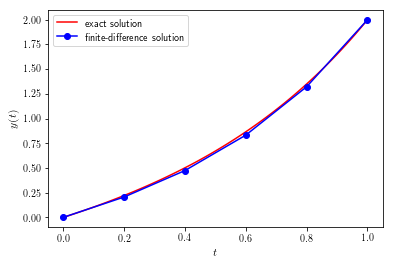

In [11]:
# Define BVP parameters
tspan = [ 0, 1 ]      # t domain
bvals = [ 0, 2 ]      # boundary values
h = 0.2               # step length

# Discretise domain
h = 0.2
N = int((tspan[1] - tspan[0]) / h) + 1
t = np.linspace(tspan[0], tspan[1], N)
y = np.zeros(t.shape)
y[0] = bvals[0]
y[-1] = bvals[1]

# Define linear system
a = np.ones(N - 2)
b = (h - h ** 2 - 2) * np.ones(N - 2)
c = (1 - h) * np.ones(N - 2)
d = np.zeros(N - 2)
d[0] = d[0] - y[0]
d[-1] = d[-1] - (1 - h) * y[-1]

# Solve linear system
y[1:-1] = tridiag_solver(a, b, c, d)

# Plot solution
fig, ax = plt.subplots()

ax.plot(t1, y1, 'r-', label='exact solution')
ax.plot(t, y, 'bo-', label='finite-difference solution')

ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

### Accuracy vs number of nodes

The solutions seen in [example 3](#Example-3) seem to show that the finite-difference method produces reasonably accurate results for this BVP. One way to improve on the accuracy of our solution is to increase the number of nodes used. 

#### Example 4
Solve the following BVP using the finite-difference method with $N=51$ and $N=501$ nodes 

\begin{align*}
    y'' + 3ty' + 7y &= \cos(2t), & t &\in [0, 3], & y(0) &= 1, & y(3) &= 0.
\end{align*}

Using [forward](#forward_difference) and [symmetric differences](#symmetric_difference) to approximate $y'$ and $y''$ respectively results in the following system

\begin{align*}
    (7h^2 - 3ht_1 - 2) y_1 + (1 + 3ht_1)y_2 &= h^2 \cos(2t_1) - y_0, \\
    y_{i-1} + (7h^2 - 3ht_i - 2) y_i + (1 + 3ht_i)y_{i+1} &= h^2 \cos(2t_i), \qquad \qquad i = 2, 3 \ldots N-3, \\
    y_{N-2} + (7h^2 - 3ht_{N-1} - 2)y_{N-1} &= h^2 \cos(2t_{N-1}) - (1 + 3ht_N) y(3).
\end{align*}

The code below calculates the solution to this system using $N=51$ and $N=501$ nodes and compares the solutions in a plot.

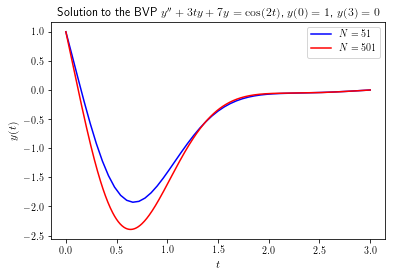

In [12]:
# Define BVP parameteres
tspan = [ 0 , 3 ]
bvals = [ 1, 0 ]

# Solve using 50 and 501 nodes
for N in [ 51, 501 ]:

    # Discretise domain
    h = (tspan[1] - tspan[0]) / (N - 1)
    t = np.linspace(tspan[0], tspan[1], N)
    y = np.zeros(t.shape)
    y[0] = bvals[0]
    y[-1] = bvals[1]

    # Define linear system
    a = np.ones(N - 2)
    b = 7 * h**2 - 3 * h * t[1:-1] - 2 
    c = 1 + 3 * h * t[1:-1]
    d = h**2 * np.cos(2 * t[1:-1])
    d[0] = d[0] - y[0]
    d[-1] = d[-1]

    # Solve linear system
    y[1:-1] = tridiag_solver(a, b, c, d)
    
    # Save solutions
    if N == 51:
        t1, y1 = t, y
    else:
        t2, y2 = t, y

# Plot solutions
fig, ax = plt.subplots()

ax.plot(t1, y1, 'b-', label='$N=51$')
ax.plot(t2, y2, 'r-', label='$N=501$')

ax.set_title("Solution to the BVP $y'' + 3ty + 7y = \cos(2t)$, $y(0)=1$, $y(3)=0$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here we can see that the solution using $N=51$ nodes is inaccurate when compared to the solution using $N=501$ nodes (we expect the more nodes used the more accurate the result). As well as increasing the number of nodes, another way we can improve our solution is to use a higher order approximation of the $y'$ derivative. 

Using the [central difference](#central_difference) (which is second-order accurate) to approximate $y'$ results in the following tridiagonal linear system

\begin{align*}
\left( 1 - \frac{3}{2} h t_i \right) y_{i-1} + (7h^2 - 2) y_i + \left(1 + \frac{3}{2} h t_i \right) y_{i+1} &= h^2 \cos(2 t_i), \qquad  i = 2, 3, \ldots, N-2, \\
    (7 h^2  - 2) y_1 + \left(1 + \frac{3}{2} h \right) y_2 &= h^2 \cos(2 t_1) - \left(1 - \frac{3}{2} h t_0 \right) y_0, \\
    \left(1 - \frac{3}{2} h t_{N-1} \right) y_{N-2} + (7h^2 - 2) y_{N-1} &= h^2 \cos(2 t_{N-1} - \left( 1 + \frac{3}{2} h t_N \right) y_N.
\end{align*}

The code below solves this system using $N=51$ and $N=501$ nodes and compares it to the solution using $N=501$ nodes for the first-order foward difference to approximate the $y'$ term.

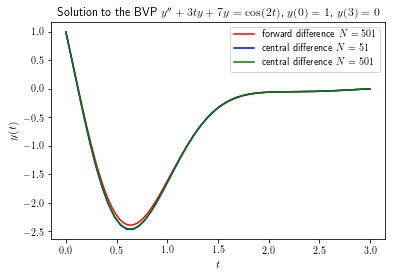

In [16]:
# Solve BVP using 51 and 501 nodes
for N in [ 51, 501 ]:

    # Discretise domain
    h = (tspan[1] - tspan[0])/(N - 1)
    t = np.linspace(tspan[0], tspan[1], N)
    y = np.zeros(t.shape)
    y[0] = bvals[0]
    y[-1] = bvals[1]

    # Define linear system
    a = 1 - 3 / 2 * h * t[1:-1]
    b = (7 * h**2 - 2) * np.ones(N - 2)
    c = 1 + 3 / 2 * h * t[1:-1]
    d = h**2 * np.cos(2 * t[1:-1])
    d[0] = d[0] - (1 - 3 / 2 * h * t[0]) * y[0]
    d[-1] = d[-1] - (1 + 3 / 2 * h * t[-1]) * y[-1]

    # Solve linear system
    y[1:-1] = tridiag_solver(a, b, c, d)
    
    # Save solutions
    if N == 51:
        t3, y3 = t, y
    else:
        t4, y4 = t, y

# Plot solutions
fig, ax = plt.subplots()

ax.plot(t2, y2, 'r-', label='forward difference $N=501$')
ax.plot(t3, y3, 'b-', label='central difference $N=51$')
ax.plot(t4, y4, 'g-', label='central difference $N=501$')

ax.set_title("Solution to the BVP $y'' + 3ty + 7y = \cos(2t)$, $y(0)=1$, $y(3)=0$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here we can see that there is very little difference between the solutions using $N=51$ and $N=501$ nodes for the central difference approximation showing that $N=51$ nodes is adequate.

---
## Summary

- A two-point BVP is defined by a second-order ODE where the solutions at the lower and upper boundaries are known.
- The shooting method guesses the initial value for $y'(0)$ and alters the guess by comparing the computed solution at the upper boundary to the known solution.
- The Secant root finding method is used to calculate improved estimates of the guess value.
- The finite-difference method uses finite-difference approximations of the derivatives in the ODE to derive a tridiagonal linear system of equations that approximates the solution to the boundary value problem.
- The Taylor series is a very efficient algorithm for solving tridiagonal linear systems of equations.
- The higher the order of a method, the fewer nodes are required to achieve the same accuracy.